Ник на Kaggle: Valentina_Gurina

Ссылка на страницу: https://www.kaggle.com/valentinagurina

In [98]:
# добавим логгирование
from comet_ml import Experiment

# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key='tZRw90ggp7Sqvv6KySBS0AXOq',
    project_name='project_booking',
    workspace='valentinagurina',
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/valentinagurina/project-booking/e5ecc791fb4a4617a2f0fe9eadf6d46a



In [99]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [100]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [101]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt


____________

# Изучение данных

### Рассмотрим данные предоставленные для соревнования 

In [102]:
# Подгрузим наши данные из соревнования

#!Внимание учтите необходимость загрузки данных!!

#DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv('data/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv('data/hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv('./submission.csv') # самбмишн

In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [104]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [105]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [106]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [107]:
sample_submission.head(2)

,reviewer_score,id
0,8.708,488440
1,7.110,274649


In [108]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewer_score  128935 non-null  float64
 1   id              128935 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 2.0 MB


df_train - Тренировочная выборка состоит из 386803 наблюдений,
в ней содержится информация о результирующем значении - том значении, что мы хотим предстказать (reviewer_score) и 16 признаках (типов float64(4), int64(5), object(8))

df_test - Тестовая выборка состоит из 128935  наблюдений,
в ней отсутствует информация о reviewer_score. Количество признаков такое же, как и в тренировочной выборке 16 признаках 

sample_submission -  Выборка для представления результатов состоит из 128935  наблюдений reviewer_score и id наблюдений
На основании этой выборки мы будем оценивать качество полученной модели

In [109]:
#Перед объединением и дальнейшей работы с данными выполним проверку на наличие полных дубликатов

print('Количество дубликатов: {}'.format(df_train[df_train.duplicated()].shape[0]))
df_train = df_train.drop_duplicates()

Количество дубликатов: 307


In [110]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

#предложенный в бейзлайне не отработал, поэтому объединим с помощью concat
data = pd.concat([df_test, df_train],    # Combine vertically
                          ignore_index = True,
                         sort = False)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515431 non-null  object 
 1   additional_number_of_scoring                515431 non-null  int64  
 2   review_date                                 515431 non-null  object 
 3   average_score                               515431 non-null  float64
 4   hotel_name                                  515431 non-null  object 
 5   reviewer_nationality                        515431 non-null  object 
 6   negative_review                             515431 non-null  object 
 7   review_total_negative_word_counts           515431 non-null  int64  
 8   total_number_of_reviews                     515431 non-null  int64  
 9   positive_review                             515431 non-null  object 
 

______________

### Первичный анализ данных

In [14]:
#быстро проанализируем данные c ProfileReport и далее перейдем к более детальному анализу
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="BOOKING analitical preview")

profile.to_file("BOOKING_analitical_preview.html")
#profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Первоначальная версия датасета содержит 17 полей со следующей информацией:

 * hotel_address — адрес отеля;
 * review_date — дата, когда рецензент разместил соответствующий отзыв;
 * average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
 * hotel_name — название отеля;
 * reviewer_nationality — страна рецензента;
 * negative_review — отрицательный отзыв, который рецензент дал отелю;
 * review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
 * positive_review — положительный отзыв, который рецензент дал отелю;
 * review_total_positive_word_counts — общее количество слов в положительном отзыве.
 * reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
 * total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
 * total_number_of_reviews — общее количество действительных отзывов об отеле;
 * tags — теги, которые рецензент дал отелю;
 * days_since_review — количество дней между датой проверки и датой очистки;
 * additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки
  * lat — географическая широта отеля;
 * lng — географическая долгота отеля.

На основании первичного анализа сформулирую ориентировочный план работ над признаками

 - 'hotel_address' - 1493 уникальных названий, на 1 больше чем названий отелей)), выделилим из этого поля как страну и город нахождения отеля,
 - 'additional_number_of_scoring' имеет высокую корреляцию с total_number_of_reviews поэтому оставим один из этих признаков, но надо проанализировать данные, чтобы выбрать какой оставить. на первый взгляд не понятен смысл данного признака, признак total_number_of_reviews более понятен
 - 'review_date' - равномерно распределенный признак, 731 уникальное значение, может попробовать создать признак актуальности review, вычтем из максимальной даты дату отзыва и попробуем включить в модель,     
 - 'average_score'- числовой признак, без пропусков и нулей, будет использоваться в построении моделей, 
 - 'hotel_name' - 1492 уникальных названий, без пропусков. Честно говоря, не знаю, что можно сделать с этим попробуем перевести данное поле в кол-во слов  и включить в модель, 
 - 'reviewer_nationality'- 227 уникальных значений. Самые популярные страны это UK - 47,55% и USA = 6,87% из из всего числа наблюдений, из данного признака сформирую категориальных признак, который будет выводить топ 10 национальностей, а прочие заменит на "other",
 - 'negative_review'- на основании данного признака посчитаю кол-во слов в отзыве и удалю, 
 - 'review_total_negative_word_counts' - у поля какие-то странные значения, пересчитаю самостоятельно на основании признака 'negative_review', этот удалю,
 - 'total_number_of_reviews' имеет высокую корреляцию с 'additional_number_of_scoring' поэтому оставим один из этих признаков
 - 'positive_review',  на основании данного признака посчитаю кол-во слов в отзыве и удалю, 
 - 'review_total_positive_word_counts' - у поля какие-то странные значения, пересчитаю самостоятельно на основании 'positive_review' , этот удалю,
 - 'total_number_of_reviews_reviewer_has_given' числовой признак, без пропусков и нулей, будет использоваться в построении моделей, но надо проанализировать наличие выбросов - макс значение 354, а 95ый квартиль - 26,  
 - 'tags' - проанализирую и разобъю теги на категории, а далее закодируем,  
 - 'days_since_review'-  переведу в числовой признак и включим в модель,
 - 'lat' - буду использовать, но надо заполнить пустые значения, попробуем сделать это на основании того, в какой стране/городе находится отель и задать ему нужные параметры 
 - 'lng'- буду использовать, но надо заполнить пустые значения, , попробуем сделать это на основании того, в какой стране/городе находится отель и задать ему нужные параметры 

In [112]:
# посчитала доп информацию по признаку hotel_name
UK_counts = round(data[data['reviewer_nationality'] == ' United Kingdom ']['reviewer_nationality'].count()/data['reviewer_nationality'].count()*100,2)
US_counts = round(data[data['reviewer_nationality'] == ' United States of America ']['reviewer_nationality'].count()/data['reviewer_nationality'].count()*100,2)

display(UK_counts, US_counts )

47.57

6.87

___________

## Первичная очистка данных
(повторю данный пункт после детальной обработки признаков)

In [113]:
#ранее мы видели где есть пропуски, подтверждаем их наличие только в 2 признаках
#проверка на наличие пропусков
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

lat    0.634032
lng    0.634032
dtype: float64

Разберемся с пропусками при детальном анализе

In [114]:
#проверка на наличие неинформативных признаков

#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in data.columns:
    #наибольшая относительная частота в признаке
    top_freq = data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = data[col].nunique() / data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
low_information_cols   

[]

___________________

# Исследование данных  и генерация признаков

#### 'hotel_address'

[Text(0, 0, 'Milan'),
 Text(1, 0, 'Amsterdam'),
 Text(2, 0, 'Barcelona'),
 Text(3, 0, 'London'),
 Text(4, 0, 'Paris'),
 Text(5, 0, 'Vienna')]

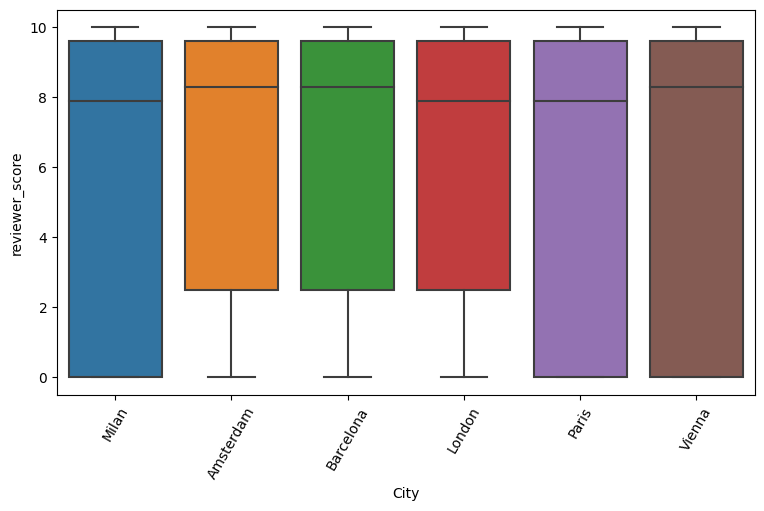

In [115]:
#из адреса выберем город нахождения отеля
data['city_hotel'] = data['hotel_address'].apply(lambda x: x.split(' ')[-5] if x.split(' ')[-1] == 'Kingdom' else  x.split(' ')[-2])

fig = plt.subplots(figsize=(9,5))

boxplot1 = sns.boxplot(data=data, x="city_hotel", y="reviewer_score")
boxplot1.set_xlabel('City')
boxplot1.set_ylabel('reviewer_score')
boxplot1.set_xticklabels(boxplot1.get_xticklabels(), rotation=60)

In [116]:
data.groupby('city_hotel')['reviewer_score'].agg(['mean', 'median', 'count'])

,mean,median,count
city_hotel,,,
Amsterdam,6.350886,8.3,57212
Barcelona,6.418190,8.3,60149
London,6.246682,7.9,262300
Milan,6.261603,7.9,37206
Paris,6.291130,7.9,59626
Vienna,6.408624,8.3,38938


В рамках промежуточных моделей исключила признак страны отелей, из-за высокой корреляции с другими признаками, а также отсутствием существенного эффекта на интересующую переменную. Оставлен только признак города, где находятся отели. Больше всего отелей расположены в Лондоне. Медианные оценки отелей в Амстердаме и Барселоне, Вене выше, чем в других городах. Средние оценки отличаются несущественно.

#### 'additional_number_of_scoring', 'total_number_of_reviews'

Text(0.5, 1.0, 'total_number_of_reviews')

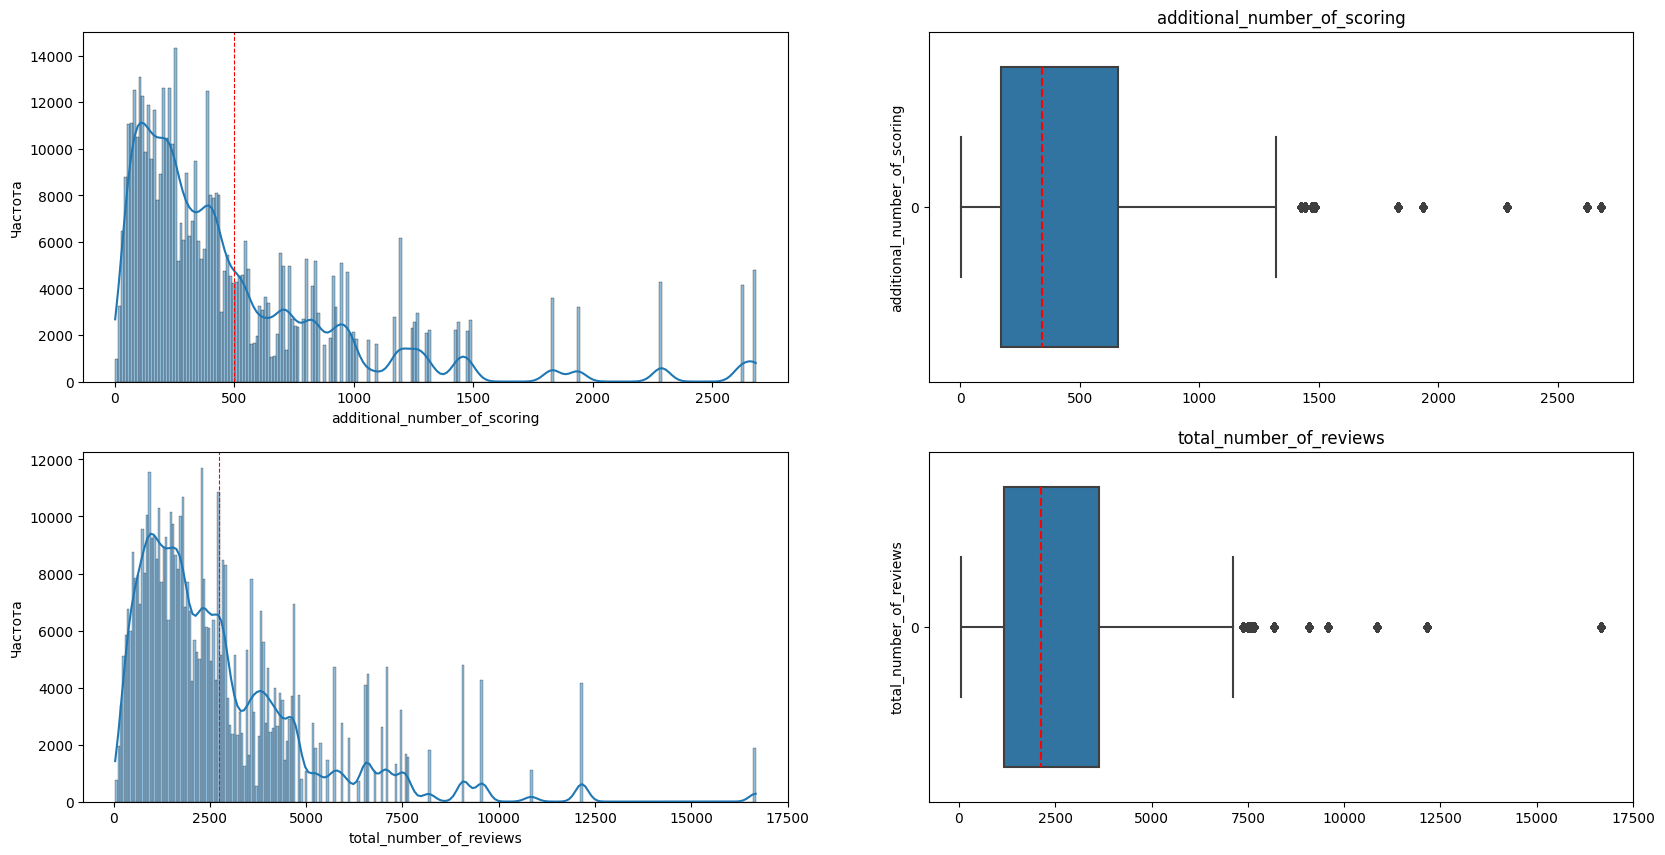

In [117]:
#визуализируем распределение признаков

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

histplot1 = sns.histplot(data['additional_number_of_scoring'], kde=True, ax=axes[0,0])

histplot1.set(xlabel='additional_number_of_scoring', ylabel='Частота')
histplot1.axvline(data['additional_number_of_scoring'].mean(), color='red', linestyle='--', linewidth=0.8)

boxplot1 = sns.boxplot(data['additional_number_of_scoring'], ax=axes[0,1], orient='h', medianprops={"color": "red", "linestyle": '--'})
boxplot1.set(ylabel='additional_number_of_scoring')
boxplot1.set_title('additional_number_of_scoring')


histplot2 = sns.histplot(data['total_number_of_reviews'], kde=True, ax=axes[1,0])

histplot2.set(xlabel='total_number_of_reviews', ylabel='Частота')
histplot2.axvline(data['total_number_of_reviews'].mean(), color='red', linestyle='--', linewidth=0.8)

boxplot2 = sns.boxplot(data['total_number_of_reviews'], ax=axes[1,1], orient='h', medianprops={"color": "red", "linestyle": '--'})
boxplot2.set(ylabel='total_number_of_reviews')
boxplot2.set_title('total_number_of_reviews')

Эти два признака имеют высокую корреляцию, поэтому оставим один из них. Для меня логически более понятен признак total_number_of_reviews — общее количество действительных отзывов об отеле.
Однако в рамках прогонов модели признак additional_number_of_scoring снижает MAPE, поэтому оставим его.

Тк данный признак не распределен нормально (распределение похоже на логнормальное), то можно преобразовать его через логарифм и далее использовать логарифм от данного признака. (в рамках прогонов модели, таким образом использование признака снижает MAPE). Отдельно отмечу, что при попытке нормализовать данный признак с помощью MinMaxScaler (который в том числе должен учитывать выбросы) MAPE был выше, как был выше при попытке убрать выбросы.

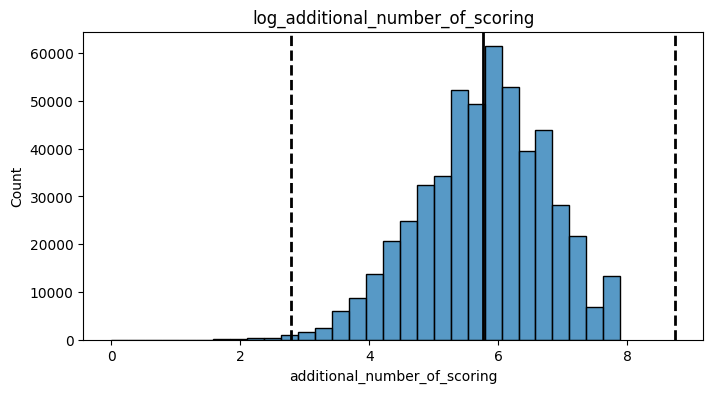

In [118]:
#визуализируем 
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_additional_number_of_scoring = np.log(data['additional_number_of_scoring'])
histplot = sns.histplot(log_additional_number_of_scoring, bins=30, ax=ax)
histplot.axvline(log_additional_number_of_scoring.mean(), color='k', lw=2)
histplot.axvline(log_additional_number_of_scoring.mean()+ 3 * log_additional_number_of_scoring.std(), color='k', ls='--', lw=2)
histplot.axvline(log_additional_number_of_scoring.mean()- 3 * log_additional_number_of_scoring.std(), color='k', ls='--', lw=2)
histplot.set_title('log_additional_number_of_scoring');

In [119]:
#создадим новый признак - логарифм от признака  total_number_of_reviews_upd
data['Log_additional_number_of_scoring'] = np.log(data['additional_number_of_scoring'])

In [120]:
#удалим  признаки
data = data.drop(['additional_number_of_scoring'], axis=1)

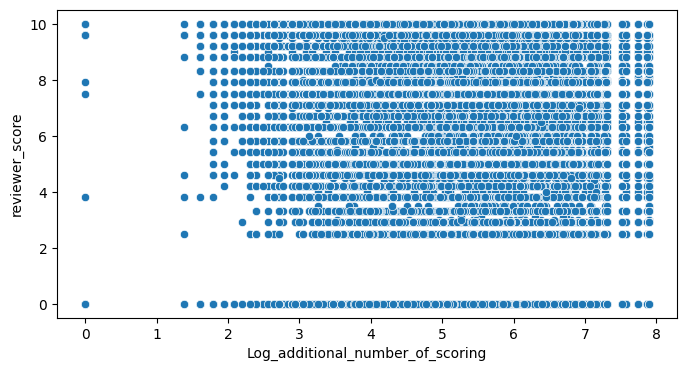

In [121]:
#посмотрим есть ли визуально зависимость нашей искомой переменной от признака
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
fig= sns.scatterplot(data=data, x="Log_additional_number_of_scoring", y="reviewer_score")

Визуализировано наличие зависимости переменной review_score от сформированного признака Log_additional_number_of_scoring

#### 'lat' 'lng'

Сразу отмечу, что в рамках прогонов модели данные признаки были исключены, тк имели высокую корреляцию с другими, более значимыми для модели признаками города нахождения отеля.
поэтому пропуски в целях обучения заполнены медианными значениями по городу нахождения отеля. Более сложные итерации по поиску конкретных координат отелей по адресу исключены из итогового кода

In [122]:
#в данном поле есть пропуски, их необходимо обработать
print('всего таких отеля с пропусками:', data[data['lat'].isnull()]['hotel_address'].nunique())

#всего таких отеля с пропусками 17 штук, поэтому можно внести инфомрацию достаточно точно

lat = data[data['lat'].isnull()]['hotel_address'].unique() 
lng = data[data['lng'].isnull()]['hotel_address'].unique()
print('пропуски долготы и ширины совпадают:',lat == lng)

всего таких отеля с пропусками: 17
пропуски долготы и ширины совпадают: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


In [123]:
# в качестве замены нулей используем медианы по городу присутствия отеля
find_lat_lng= data[data['lat'].isnull()].groupby('city_hotel').count()[['lat', 'lng']]
find_lat_lng

,lat,lng
city_hotel,,
Barcelona,0,0
Paris,0,0
Vienna,0,0


In [124]:
data.groupby('city_hotel')[['lat','lng']].median()

,lat,lng
city_hotel,,
Amsterdam,52.366373,4.888644
Barcelona,41.388024,2.169670
London,51.510844,-0.142448
Milan,45.478736,9.196131
Paris,48.867189,2.328075
Vienna,48.204465,16.368640


In [125]:

lat_lng = [[41.388024, 2.169670],
           [48.867189, 2.328075],
           [48.204465, 16.368640]]

In [126]:
for i in range (3):
    find_lat_lng.iloc[i] = lat_lng[i]
find_lat_lng

data = data.set_index('city_hotel')
data.update(find_lat_lng)
data = data.reset_index()

In [127]:
#в ходе работы с данными появлиась идея реализовать признак, который оценит удаленность отеля от центра города
#создадим признак, который будет оценивать удаленность отеля от центра города

#центры городов (взяты из интернета)

info = [
['Paris', 48.85341, 2.3488],
['Milan', 45.46427, 9.18951],
['Amsterdam', 52.37403, 4.88969],
['Barcelona', 41.38879, 2.15899],
['London', 51.50853, -0.12574],
['Vienna', 48.20849, 16.37208],
]

city_centers = pd.DataFrame(info, columns=['City', 'City_lat','City_lng']) 
data = data.merge(city_centers[['City_lat','City_lng']], left_on='city_hotel', right_on=city_centers['City'], how = 'left')

In [129]:
#далее нашли пакет, с помощью которого можно произвести данный расчет 
#!pip install geopy

# c помощью пакета geopy  сделаем расчет дистанции и сохраним как новый признак

from geopy.distance import geodesic

def distancer(row):
    
    coords_1 = (row['lat'], row['lng'])
    coords_2 = (row['City_lat'], row['City_lng'])
    distance = geodesic(coords_1, coords_2).km
    return distance

data['distance_to_center'] = data.apply(distancer, axis=1)

In [130]:
#удалим вспомогательные поля
data = data.drop(['City_lat','City_lng'], axis=1)

Text(0.5, 1.0, 'distance_to_center')

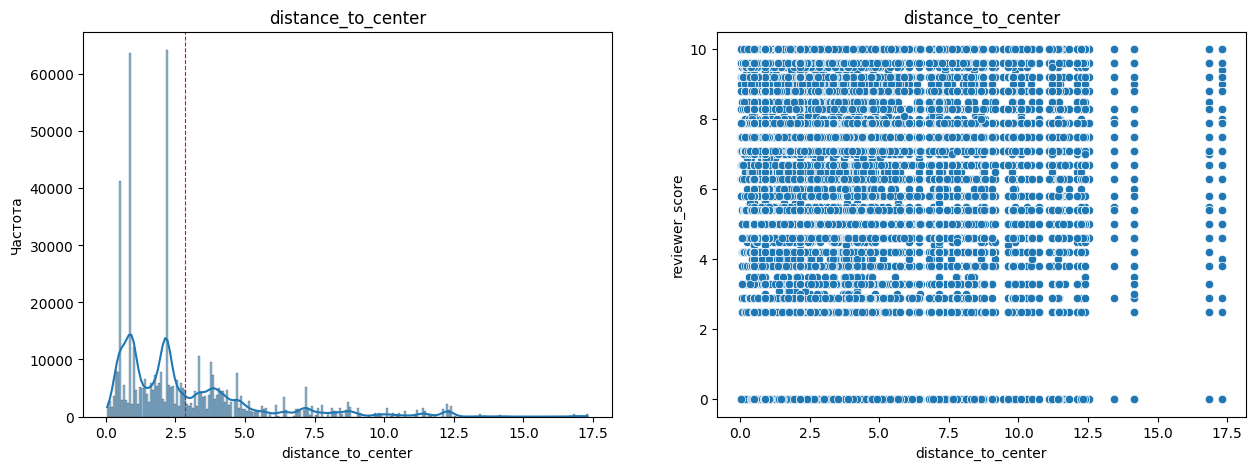

In [131]:
#визуализируем распределение признака

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['distance_to_center'], kde=True, ax=axes[0])

axes[0].set(xlabel='distance_to_center', ylabel='Частота')
axes[0].set_title('distance_to_center')
axes[0].axvline(data['distance_to_center'].mean(), color='red', linestyle='--', linewidth=0.8)


sns.scatterplot(data=data, x="distance_to_center", y="reviewer_score")
axes[1].set(ylabel='reviewer_score')
axes[1].set_title('distance_to_center')

В ходе тестовых прогонов реализованный признак distance_to_center оказался значим и улучшил качество итоговой модели по MAPE (логарифмирование  данного признака не повлияло на MAPE, а нормализация ухудшила MAPE, поэтому оставляем его в данной форме )

#### 'review_date'

In [132]:
#переведем в нужный формат данные, посчитаем показатель, и сохраним новый признак
data['review_date'] = pd.to_datetime(data['review_date'], dayfirst=False)
max_date = data['review_date'].max()
data['actuality_review'] = max_date-data['review_date']
data['actuality_review'] = pd.to_numeric(data['actuality_review'].dt.days, downcast='integer')

#добавим признак месяца года
data['month_of_review'] = pd.DatetimeIndex(data['review_date']).month

#удалим  признаки
data = data.drop(['review_date'], axis=1)

Признаки года, даты, дня недели не оказали существенного положительного влияния на модель, поэтому не приводятся в итоговом коде

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

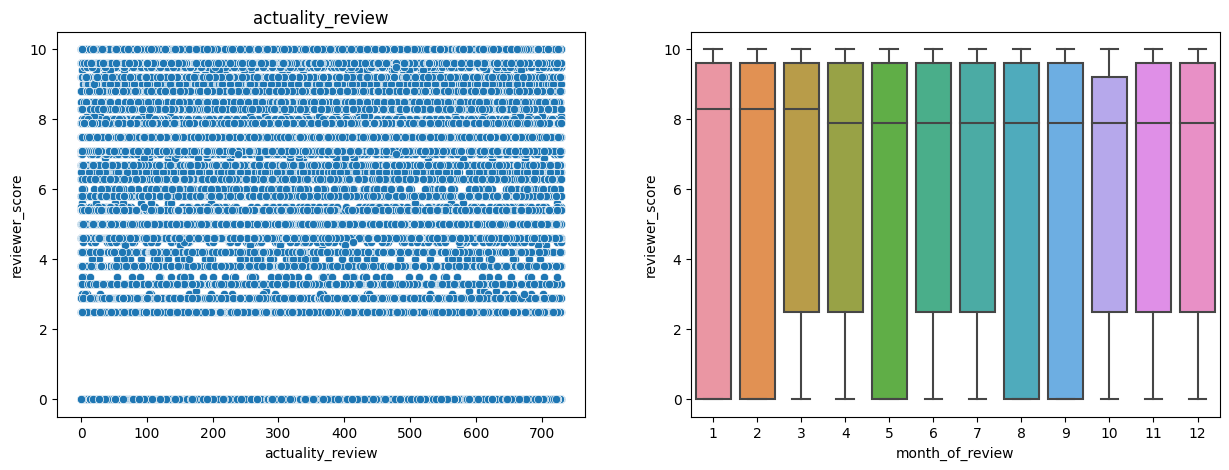

In [133]:
#визуализируем распределение признака

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(data=data, x="actuality_review", y="reviewer_score", ax=axes[0])
axes[0].set(xlabel='actuality_review', ylabel='reviewer_score')
axes[0].set_title('actuality_review')


sns.boxplot(data=data, x="month_of_review", y="reviewer_score", ax=axes[1])
axes[1].set_xlabel('month_of_review')
axes[1].set_ylabel('reviewer_score')
axes[1].set_xticklabels(axes[1].get_xticklabels())

In [134]:
data.groupby('month_of_review')['reviewer_score'].agg(['mean', 'median', 'count'])

,mean,median,count
month_of_review,,,
1,6.340859,8.3,42133
2,6.390874,8.3,38352
3,6.374461,8.3,41090
4,6.333693,7.9,42872
5,6.255543,7.9,46470
6,6.300273,7.9,42877
7,6.279229,7.9,49291
8,6.292872,7.9,50632
9,6.213177,7.9,42369


Зафиксируем, что медиана оценок в 1кв (и соответственно в месяцах 1,2,3) выше, чем в других месяцах/кварталах. При этом бинарный признак 1ого квартала не улучшил модель, поэтому его не рассматриваю. 

In [135]:
#позднее оказалось, что новый признак actuality_review аналогичен признаку days_since_review, если выделить из второго только числовую часть
data['days_since_review_num'] =  data['days_since_review'].str.extract('(\d+)', expand=False).astype(float)

#подтвердим наличие корреляции между ними:
corr1 = data['days_since_review_num'].corr(data['actuality_review'])
print('Корреляция между признаками:', round(corr1,7))

#оставим один из признаков (actuality_review) для включения в модель
data = data.drop(['days_since_review_num', 'days_since_review'], axis=1)

Корреляция между признаками: 1.0


#### 'average_score'

Text(0.5, 1.0, 'average_score')

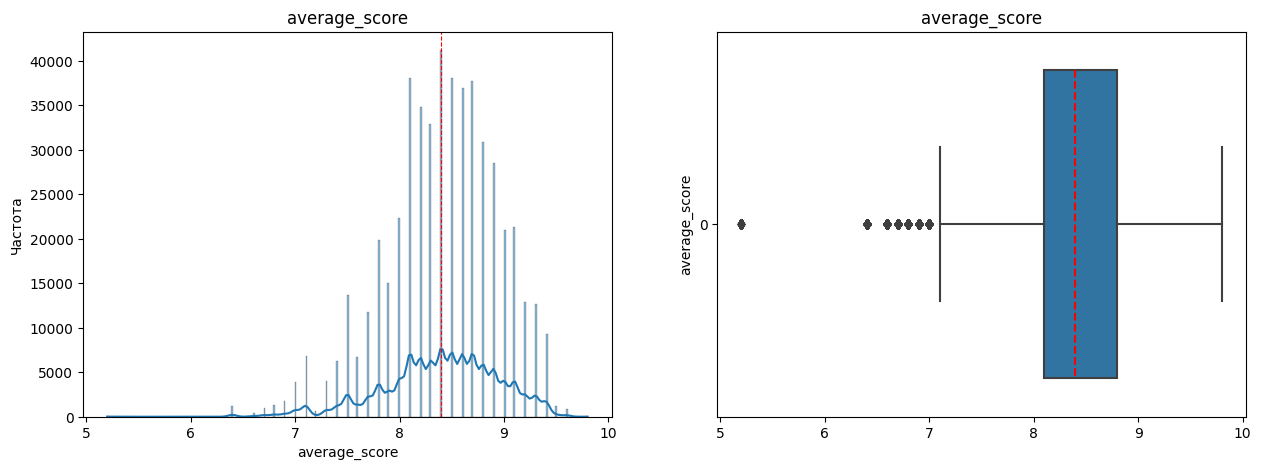

In [137]:
#визуализируем распределение признака

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['average_score'], kde=True, ax=axes[0])

axes[0].set(xlabel='average_score', ylabel='Частота')
axes[0].set_title('average_score')
axes[0].axvline(data['average_score'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['average_score'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='average_score')
axes[1].set_title('average_score')

In [138]:
#Заменим отдельно-стоящие наблюдения (65 шт) - 5.2 на близлежащие к ним - 6.4. Т.к. можно предположить данные наблюдения являются выбросами
data['average_score'] = data['average_score'].apply(lambda x: 6.4 if x == 5.2 else x )

Очистка от выбросов оказала положительное влияние на качество модели по MAPE

#### 'hotel_name' 

In [139]:
#создадим новый признак - длину названия отеля
data['hotel_name_count'] = data['hotel_name'].str.split().apply(len)

In [140]:
#также создадим новый признак, что отель входит в топ сетевых отелей европы (список взяла с первой ссылки в интернете)
data['hotel_name'] =  data['hotel_name'].str.lower()

def find_top_hotels (data):
    top_hotels_list = ['hilton', 'marriott','hyatt','sheraton','wyndham', 'accor','carlson', 'choice', 'holiday', 'western']
    words = data.split()
    count = 0
    for word in words:
        if word in top_hotels_list:
            return 1
        else: return 0

data['top_hotels_flag'] = data['hotel_name'].apply(find_top_hotels)

data['top_hotels_flag'].groupby(data['top_hotels_flag']).count()

top_hotels_flag
0    481757
1     33674
Name: top_hotels_flag, dtype: int64

In [141]:
#удалим исходный признак
data = data.drop(['hotel_name'], axis=1)

Text(0.5, 1.0, 'top_hotels_flag')

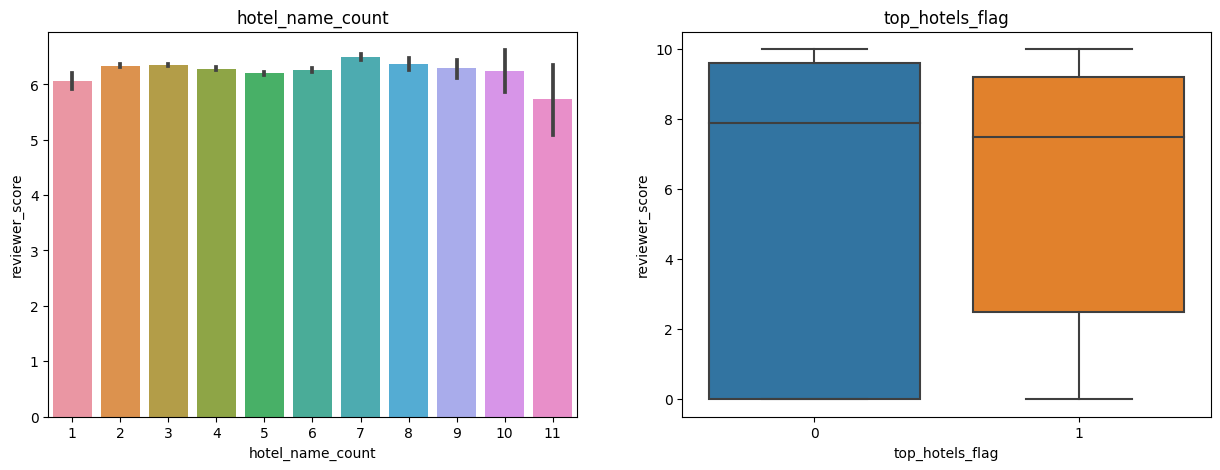

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=data, x="hotel_name_count", y="reviewer_score", ax=axes[0])

axes[0].set(xlabel='hotel_name_count', ylabel='reviewer_score')
axes[0].set_title('hotel_name_count')


sns.boxplot(data=data, x="top_hotels_flag", y="reviewer_score", ax=axes[1])
axes[1].set(ylabel='reviewer_score')
axes[1].set_title('top_hotels_flag')

Результат несколько неожиданный - вхождение отеля в список топ сетевых отелей несущественно, но снижает оценку пользователей. По признаку hotel_name_count (который равен от 1 до 11 слов в названии отеля) есть различия в оценках reviewer_score (максимальная оценка у отелей с длиной названия в 7 слов, минимальная - в 11.)

#### 'reviewer_nationality'

In [143]:
#выделим в качестве признака вхождение в топ 10 национальностей тех, кто оставляет отзывы
data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: x.strip())
top_nationalities = data['reviewer_nationality'].groupby(data['reviewer_nationality']).count().sort_values(ascending=False).head(10)

data['top_reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: x if x in top_nationalities else 'Other' )
top_nationalities

reviewer_nationality
United Kingdom              245165
United States of America     35390
Australia                    21663
Ireland                      14820
United Arab Emirates         10230
Saudi Arabia                  8945
Netherlands                   8762
Switzerland                   8672
Germany                       7936
Canada                        7887
Name: reviewer_nationality, dtype: int64

In [144]:
#удалим исходный признак
data = data.drop(['reviewer_nationality'], axis=1)

<Axes: xlabel='top_reviewer_nationality', ylabel='reviewer_score'>

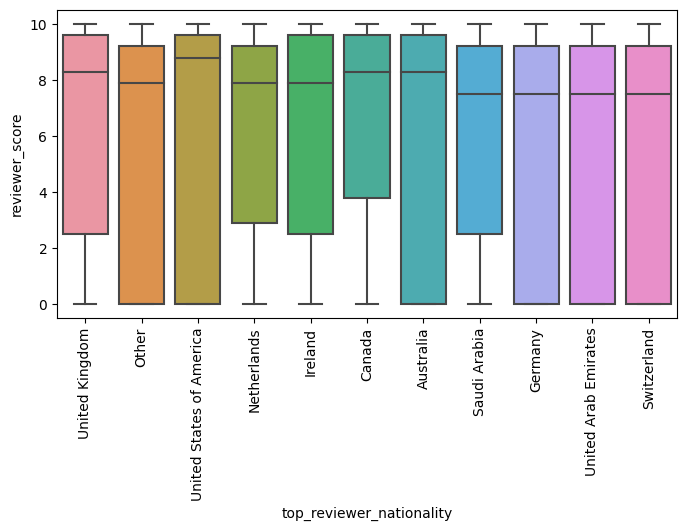

In [145]:
fig = plt.subplots( figsize=(8, 4))
fig = sns.boxplot(data=data, x="top_reviewer_nationality", y="reviewer_score")
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig

Отметим, что ревьюеры из США, Канады и Австралии склонны к выставлению более высоких оценок (может это связано с тем, что они путешествуют издалека (те в анализе только европейские отели) и в рамках путешествим останавливаются в более дорогих и качественных отелях!?)

Однако выведение отдельной переменной о том, что ревьюер из данных стран негативно сказало на MAPE модели, поэтому признак был исключен из итогового кода

#### negative_review 
#### review_total_negative_word_counts
#### positive_review
#### review_total_positive_word_counts

В рамках анализа данных признаков была проведена попытка выделить существенные части позитивных/негативных отзывов, 
тк судя по прогонам модели информация в данных полях является крайне значимой для искомого показателя

In [146]:
#изучим самые популярные негативные отзывы
data['negative_review'] = data['negative_review'].str.lower()
data['negative_review'] = data['negative_review'].str.strip()
negative_review_top = data['negative_review'].groupby(data['negative_review']).count().sort_values(ascending=False).head(40)
#negative_review_top

In [147]:
#Видим, что многие из отзывов, фактически НЕ являются негативными. попробуем с ними поработать. создадим флаг их наличия в отзыве
def find_no_neg_words (data):

    no_neg_words_list = ['no negative','nothing','n a', 'none',' ','nothing really','all good','no complaints', 'nothing at all', 'nothing to dislike', 'nil','everything was perfect',
                         'na','can t think of anything', 'absolutely nothing', 'everything was great', 'no', 'nothing not to like','nothing to complain about','nothing all good','having to leave'
                         'not much','i liked everything','non','nothing it was perfect','everything was good','liked everything','nothing in particular','no complaints at all','nothing to report',
                         'no negatives','no complaints at all','nothing everything was perfect','having to leave','nothing everything was great','all was good','nothing everything was great',
                         'not applicable','everything was fine','it was all good','loved everything','there was nothing we didn t like',''
                         ]
    data = data.strip()
    if data in no_neg_words_list:
        return 1
    else: return 0

data['no_negative_words_flag'] = data['negative_review'].apply(find_no_neg_words)

# c учетом данной корректировки пересчитаем признак длины негативного отзыва, если флаг no_negative_words_flag
# срабатывает (т.е. 1), то мы обнуляем ко-во слов в отзыве, тк по факту он не является является негативным
data['negative_review_clean_count'] = np.where(data['no_negative_words_flag']==1, 0, data['negative_review'].str.split().apply(len))

In [148]:
#изучим самые популярные позитивные отзывы
data['positive_review'] = data['positive_review'].str.lower()
data['positive_review'] = data['positive_review'].str.strip()
positive_review_top = data['positive_review'].groupby(data['positive_review']).count().sort_values(ascending=False).head(30)
#positive_review_top

In [149]:
#Видим, что многие из отзывов, фактически НЕ являются позитивными. попробуем с ними поработать. создадим флаг их наличия в отзыве
def find_no_pos_words (data):

    no_pos_words_list = ['no positive','nothing','n a', 'none','nil',
                         'na', 'no', 'non'
                         ]
    data = data.strip()
    if data in no_pos_words_list:
        return 1
    else: return 0

data['no_positive_words_flag'] = data['positive_review'].apply(find_no_pos_words)

# c учетом данной корректировки пересчитаем признак длины негативного отзыва
data['positive_review_clean_count'] = np.where(data['no_positive_words_flag']==1, 0, data['positive_review'].str.split().apply(len))

In [150]:
# также на основании обновленных признаков создали новый признак: соотношение длины положит и отрицательного отзыва, логика в нем: что чем ниже/выше оценка 
# - тем больше будет слов в отрицательном/положительном отзыве

data['pos_neg_ratio'] = data['positive_review_clean_count']/(data['negative_review_clean_count']+1)

In [151]:
#далее появилась идея посчитать кол-во слов, которые имеют положительную окраску в положительном отзыве. Создадим такой признак и не забываем почистить данный параметр с учетом информации о не положительных словах
def count_pos_word (data):

    positive_words_list = ['great','good','perfect', 'excellent','perfect','nice','lovely',
                           'comfortable', 'very', 'clean', 'friendly','pleasant', 'helpful','kind','homely','beautiful','delightful',
                           'grateful','graceful','glad', 'happy','thankful','wonderful','free','loved']
    words = data.split()
    count = 0
    for word in words:
        if word in positive_words_list:
            count +=1
    return count

data['positive_words_count'] = data['positive_review'].apply(count_pos_word)
data['positive_words_count'] = np.where(data['no_positive_words_flag']==1, 0, data['positive_words_count'])

In [152]:
#посмотреть самые популярные слова в отзывах
from collections import Counter
results = Counter()
data['positive_review'].str.lower().str.split().apply(results.update).sort_values()
df = pd.DataFrame.from_dict(results, columns=['count'], orient='index', ).reset_index()
df = df.sort_values(['count'], ascending=False)
#df

In [153]:
#Таким же образом создали и негативный вариант и не забываем почистить данный параметр с учетом информации о не негативных словах
def count_neg_word (data):

    negative_words_list = ['dislike','expensive','small', 'size','bad','noise', 'no','negative','nothing','little']
    words = data.split()
    count = 0
    for word in words:
        if word in negative_words_list:
            count +=1
    return count

data['negative_words_count'] = data['negative_review'].apply(count_neg_word)
data['negative_words_count'] = np.where(data['no_negative_words_flag']==1, 0, data['negative_words_count'])

In [154]:
#посмотреть самые популярные слова в отзывах
from collections import Counter
results = Counter()
data['negative_review'].str.lower().str.split().apply(results.update).sort_values()
df = pd.DataFrame.from_dict(results, columns=['count'], orient='index', ).reset_index()
df = df.sort_values(['count'], ascending=False)
#df

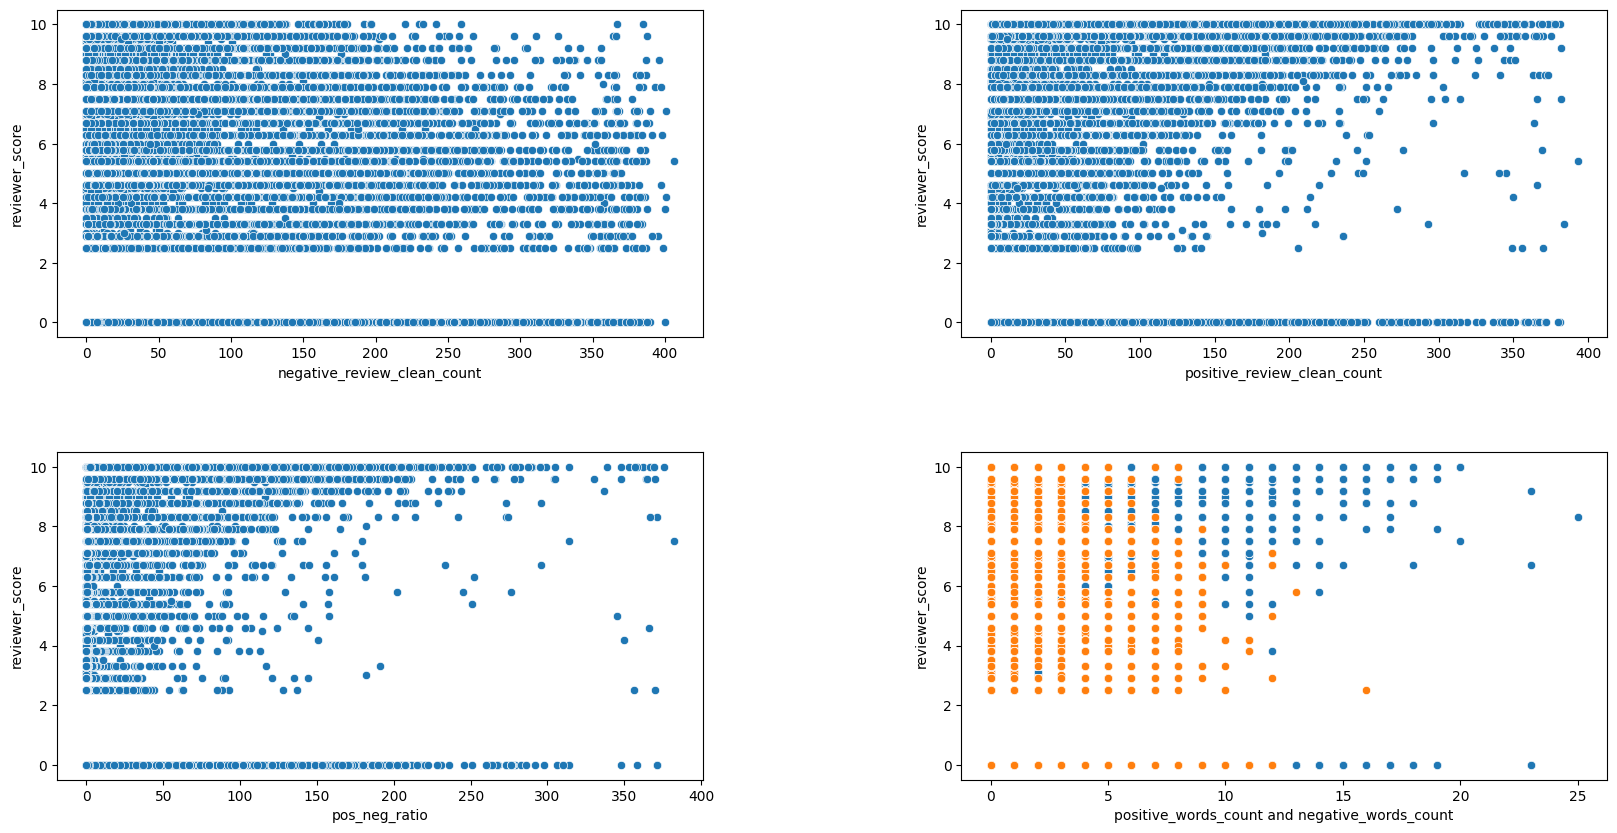

In [155]:
#визуализируем разработанные признаки

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.subplots_adjust(hspace=.35, wspace=.4)

scatterplot1 = sns.scatterplot(data=data, x="negative_review_clean_count", y="reviewer_score", ax=axes[0,0])
scatterplot1.set_xlabel('negative_review_clean_count')
scatterplot1.set_ylabel('reviewer_score')

scatterplot2 = sns.scatterplot(data=data, x="positive_review_clean_count", y="reviewer_score", ax=axes[0,1])
scatterplot2.set_xlabel('positive_review_clean_count')
scatterplot2.set_ylabel('reviewer_score')

scatterplot3 = sns.scatterplot(data=data, x="pos_neg_ratio", y="reviewer_score", ax=axes[1,0])
scatterplot3.set_xlabel('pos_neg_ratio')
scatterplot3.set_ylabel('reviewer_score')

scatterplot4 = sns.scatterplot(data=data, x="positive_words_count", y="reviewer_score", ax=axes[1,1])
scatterplot4.set_xlabel('positive_words_count and negative_words_count')
scatterplot4.set_ylabel('reviewer_score')

scatterplot5 = sns.scatterplot(data=data, x="negative_words_count", y="reviewer_score", ax=axes[1,1])


На графиках видна зависимость признака review_score от разработанных и преобразованных признаков, используем их в модели. Они качественно повышают ее качество, более того, самый значимым фактором модели является показтель pos_neg_ratio

In [156]:
#дальше создали ряд похожих признаков с поиском наличия какого-то популярного слова в отзыве (обозначение _flag), а также кол-ва упоминаний данного слова в отзыве (обозначение _count)

#отношение к номеру, хорошее/плохое
def room_count (data):
    
    words = data.split()
    count = 0
    for word in words:
        if word == 'room' or word == 'rooms' or word == 'bathroom':
            count +=1
    return count
data['neg_room_count'] = data['negative_review'].apply(room_count)
data['pos_room_count'] = data['positive_review'].apply(room_count)

#отношение персонала, хорошее/плохое (в итоге это слово встречается только один раз макс, поэтому переименуем count во flag)
def staff_count (data):

    words = data.split()
    count = 0
    for word in words:
        if data == 'staff':
            count +=1
    return count

data['pos_staff_flag'] = data['positive_review'].apply(staff_count)
data['neg_staff_flag'] = data['negative_review'].apply(staff_count)

#отношение к локации, хорошее/плохое  (в итоге это слово встречается только один раз макс, поэтому переименуем count во flag)
def location_count (data):

    words = data.split()
    count = 0
    for word in words:
        if data == 'location':
            count +=1
    return count

data['pos_location_flag'] = data['positive_review'].apply(location_count)
data['neg_location_flag'] = data['negative_review'].apply(location_count)

Text(0, 0.5, 'reviewer_score')

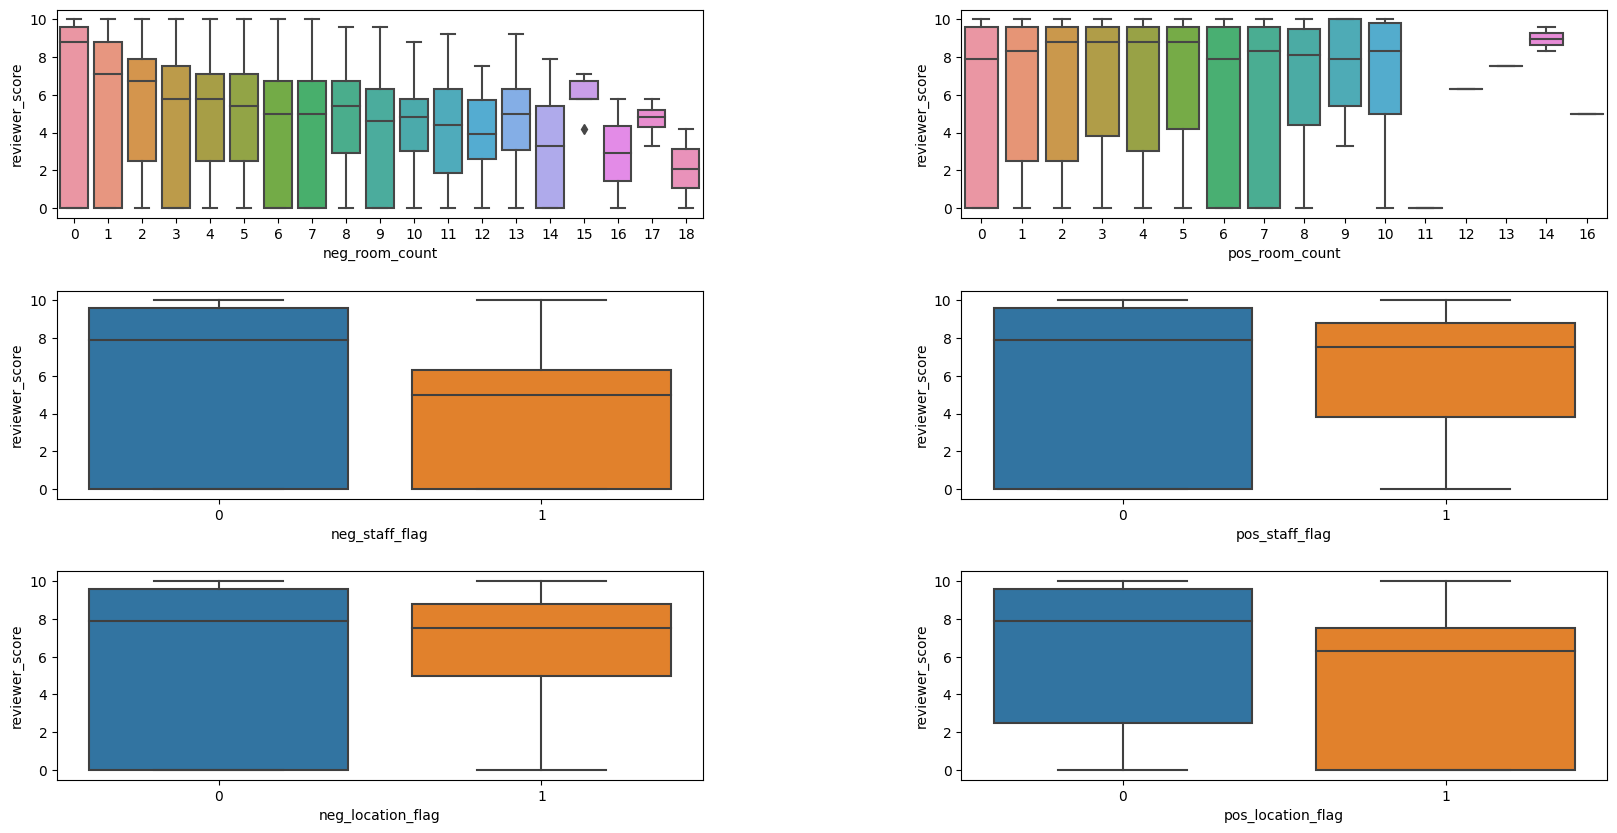

In [157]:
#визуализируем разработанные признаки

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
plt.subplots_adjust(hspace=.35, wspace=.4)

boxplot1 = sns.boxplot(data=data, x="neg_room_count", y="reviewer_score", ax=axes[0,0])
boxplot1.set_xlabel('neg_room_count')
boxplot1.set_ylabel('reviewer_score')

boxplot2 = sns.boxplot(data=data, x="pos_room_count", y="reviewer_score", ax=axes[0,1])
boxplot2.set_xlabel('pos_room_count')
boxplot2.set_ylabel('reviewer_score')

boxplot3 = sns.boxplot(data=data, x="neg_staff_flag", y="reviewer_score", ax=axes[1,0])
boxplot3.set_xlabel('neg_staff_flag')
boxplot3.set_ylabel('reviewer_score')

boxplot4 = sns.boxplot(data=data, x="pos_staff_flag", y="reviewer_score", ax=axes[1,1])
boxplot4.set_xlabel('pos_staff_flag')
boxplot4.set_ylabel('reviewer_score')

boxplot5 = sns.boxplot(data=data, x="neg_location_flag", y="reviewer_score", ax=axes[2,0])
boxplot5.set_xlabel('neg_location_flag')
boxplot5.set_ylabel('reviewer_score')

boxplot6 = sns.boxplot(data=data, x="pos_location_flag", y="reviewer_score", ax=axes[2,1])
boxplot6.set_xlabel('pos_location_flag')
boxplot6.set_ylabel('reviewer_score')


Сформированные, в особенности те, что имеют негативный окрас, отлично деляет выборку по показателю reviewer_score и итогово помогают улучшить качество модели по MAPE.
Включим все в итоговую модель 

In [158]:
data = data.drop([ 'negative_review', 'review_total_negative_word_counts','positive_review',
       'review_total_positive_word_counts'], axis=1)

#### 'total_number_of_reviews_reviewer_has_given'

Text(0.5, 1.0, 'total_number_of_reviews_reviewer_has_given')

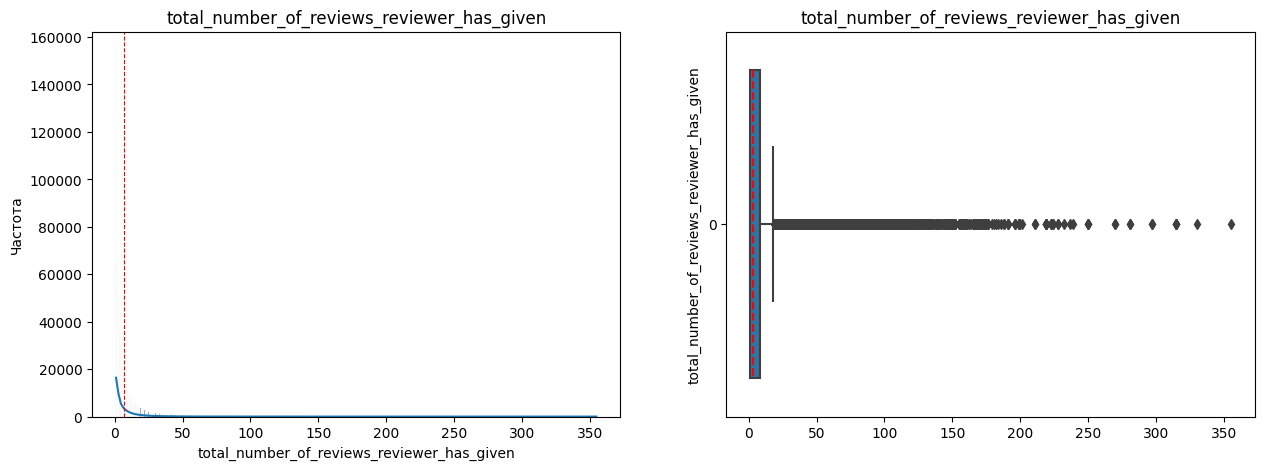

In [159]:
#визуализируем распределение признака

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['total_number_of_reviews_reviewer_has_given'], kde=True, ax=axes[0])

axes[0].set(xlabel='total_number_of_reviews_reviewer_has_given', ylabel='Частота')
axes[0].set_title('total_number_of_reviews_reviewer_has_given')
axes[0].axvline(data['total_number_of_reviews_reviewer_has_given'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['total_number_of_reviews_reviewer_has_given'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='total_number_of_reviews_reviewer_has_given')
axes[1].set_title('total_number_of_reviews_reviewer_has_given')

Оставим в модели как есть, без преобразований

#### 'tags' 

In [160]:
#обработаем теги
new_tags = data['tags'].str.replace(" ']", '')
new_tags = new_tags.str.replace("[' ", '')
new_tags = new_tags.str.replace("' ", '')
new_tags = new_tags.str.replace(" '", '')


tags_a= pd.DataFrame()
tags_a['tags'] = new_tags.astype(str)

#с животными
tags_a['pet'] = tags_a['tags'].apply(lambda x: 1 if x.split(', ')[0] == 'With a pet' else 0 )
tags_a['cleaned_tags'] = tags_a['tags'].str.replace('With a pet, ', '')

#с мобильного
tags_a['device'] = tags_a['tags'].apply(lambda x: 1 if x.split(', ')[-1] == 'Submitted from a mobile device' else 0 )
tags_a['cleaned_tags'] = tags_a['cleaned_tags'].str.replace(', Submitted from a mobile device', '')

#команировка/отдых
tags_a['trip_type'] = tags_a['cleaned_tags'].apply(lambda x: x.split(', ')[0] if x.split(', ')[0] == 'Leisure trip' or x.split(', ')[0] == 'Business trip' else 'NA'  )
tags_a['cleaned_tags'] = tags_a['cleaned_tags'].str.replace('Leisure trip, ', '')
tags_a['cleaned_tags'] = tags_a['cleaned_tags'].str.replace('Business trip, ', '')

#компания
tags_a['traveler'] = tags_a['cleaned_tags'].apply(lambda x: x.split(', ')[0])
list_of_rep = ['Couple,', 'Solo traveler', 'Family with young children', 'Group',
       'Family with older children', 'Travelers with friends']

tags_a['cleaned_tags'] = tags_a['cleaned_tags'].str.replace('Couple, ', '').str.replace('Solo traveler, ', '').str.replace('Family with young children, ', '').str.replace('Solo traveler, ', '')
tags_a['cleaned_tags'] = tags_a['cleaned_tags'].str.replace('Group', '').str.replace('Group, ', '').str.replace('Family with older children, ', '').str.replace('Travelers with friends, ', '')


#срок пребывания (в строке попались некоторые ошибки, которые надо вычистить)
tags_a['duration_of_stay'] = tags_a['cleaned_tags'].apply(lambda x: x.split(', ')[-1])
#чтобы вычистить ошибки, очистим информацию и оставим только числовое значение кол-ва ночей ипользуя регулярное значение
tags_a['number_of_days'] = tags_a['duration_of_stay'].str.extract('(\d+)', expand=False)
tags_a['number_of_days'] = tags_a['number_of_days'].astype(float)
#удалим столбец с ошибками
tags_a = tags_a.drop(['duration_of_stay'], axis=1)
#удалим вспомогательный столбец cleaned_tags
tags_a = tags_a.drop(['cleaned_tags'], axis=1)
#добавим информацию о кол-ве тегов
tags_a['tags_num'] = data['tags'].str.count(',')+1

#объедим датасеты
data = pd.merge(
    data,
    tags_a,
    how="left",
    left_index=True, 
    right_index=True
)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 37 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   city_hotel                                  515431 non-null  object 
 1   hotel_address                               515431 non-null  object 
 2   average_score                               515431 non-null  float64
 3   total_number_of_reviews                     515431 non-null  int64  
 4   total_number_of_reviews_reviewer_has_given  515431 non-null  int64  
 5   tags_x                                      515431 non-null  object 
 6   lat                                         515431 non-null  float64
 7   lng                                         515431 non-null  float64
 8   sample                                      515431 non-null  int64  
 9   reviewer_score                              515431 non-null  float64
 

Text(0, 0.5, 'reviewer_score')

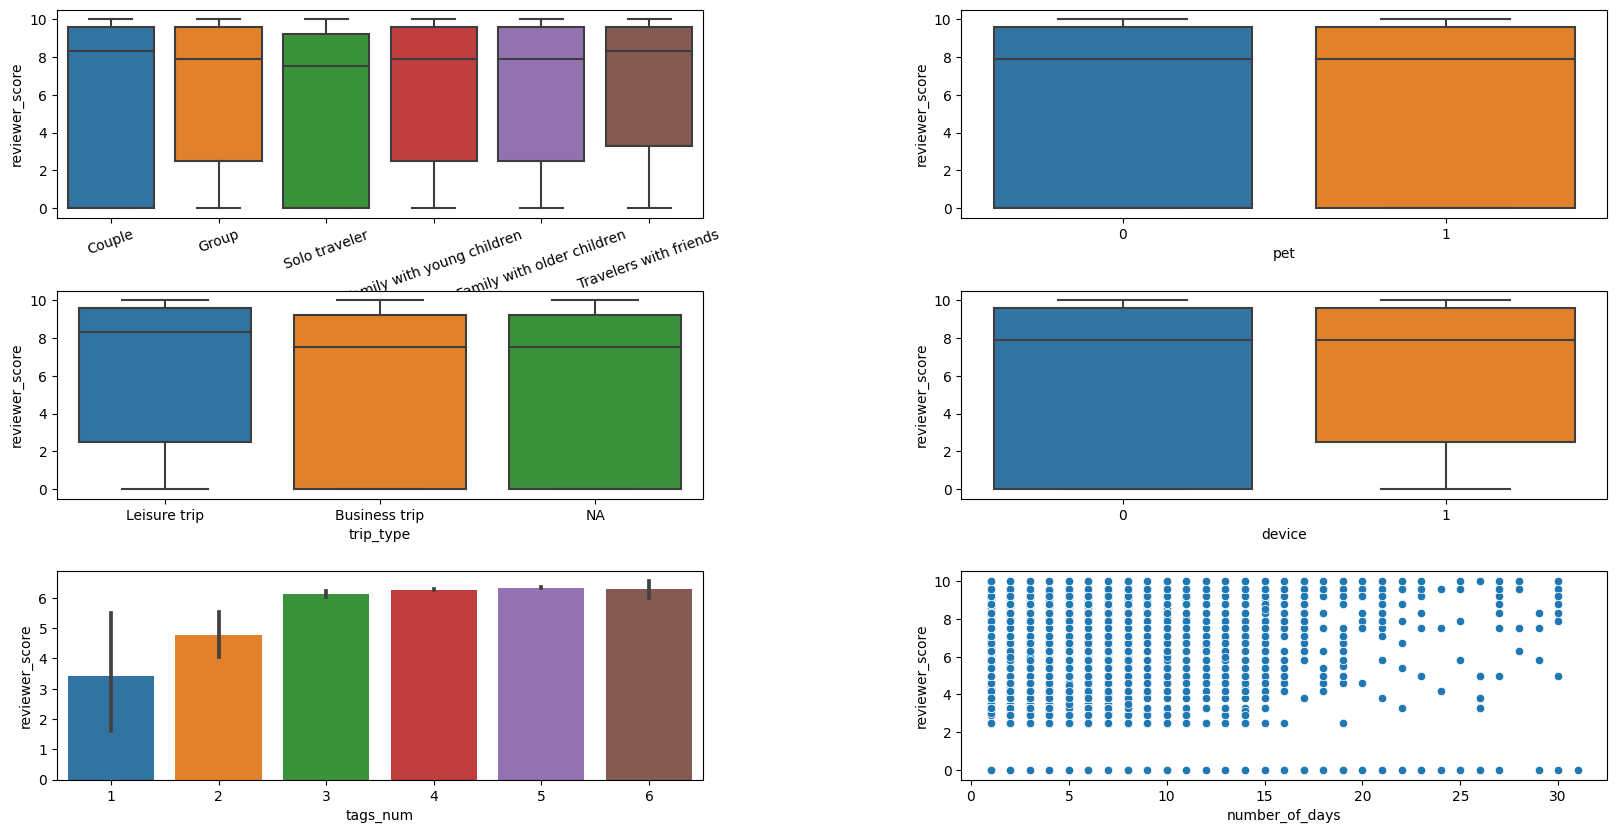

In [161]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
plt.subplots_adjust(hspace=.35, wspace=.4)

boxplot1 = sns.boxplot(data=data, x="traveler", y="reviewer_score", ax=axes[0,0])
boxplot1.set_xlabel('traveler')
boxplot1.set_ylabel('reviewer_score')
boxplot1.set_xticklabels(boxplot1.get_xticklabels(), rotation=20)

boxplot2 = sns.boxplot(data=data, x="pet", y="reviewer_score", ax=axes[0,1])
boxplot2.set_xlabel('pet')
boxplot2.set_ylabel('reviewer_score')

boxplot3 = sns.boxplot(data=data, x="trip_type", y="reviewer_score", ax=axes[1,0])
boxplot3.set_xlabel('trip_type')
boxplot3.set_ylabel('reviewer_score')

boxplot4 = sns.boxplot(data=data, x="device", y="reviewer_score", ax=axes[1,1])
boxplot4.set_xlabel('device')
boxplot4.set_ylabel('reviewer_score')

barplot = sns.barplot(data=data, x="tags_num", y="reviewer_score", ax=axes[2,0])
barplot.set_xlabel('tags_num')
barplot.set_ylabel('reviewer_score')

scatterplot = sns.scatterplot(data=data, x="number_of_days", y="reviewer_score", ax=axes[2,1])
scatterplot.set_xlabel('number_of_days')
scatterplot.set_ylabel('reviewer_score')


In [162]:
data = data.drop([ 'tags_x', 'tags_y'], axis=1)

Из всех разработанных признаков имеет смысл обратить внимание, на признак tag_num, указывающий, что в отзыве с 1 или 2 тегами оценка ревьюера существенно ниже тех отзывов, где тегов больше 2х
Также присутствует зависимость оцениваемого признака с разработанным признаком - кол-во дней пребывания в отеле, оценки пушетественников, кто пребывал в отеле больше в целом лучше, но таких существенно меньше.
(была проведена попытка свести этот признак к 8 категориям, что не оказало положительного эффекта на MAPE) 

____________

In [163]:
#проверка на наличие пропусков
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

number_of_days    0.03725
dtype: float64

In [164]:
#заменим отсутствующие означения на моду

#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'number_of_days': data['number_of_days'].mode()[0]

}
#заполняем оставшиеся записи константами в соответствии со словарем values
data = data.fillna(values)
#выводим результирующую долю пропусков
display(data.isnull().mean())

city_hotel                                    0.0
hotel_address                                 0.0
average_score                                 0.0
total_number_of_reviews                       0.0
total_number_of_reviews_reviewer_has_given    0.0
lat                                           0.0
lng                                           0.0
sample                                        0.0
reviewer_score                                0.0
Log_additional_number_of_scoring              0.0
distance_to_center                            0.0
actuality_review                              0.0
month_of_review                               0.0
hotel_name_count                              0.0
top_hotels_flag                               0.0
top_reviewer_nationality                      0.0
no_negative_words_flag                        0.0
negative_review_clean_count                   0.0
no_positive_words_flag                        0.0
positive_review_clean_count                   0.0


In [165]:
#проверка на наличие неинформативных признаков

#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in data.columns:
    #наибольшая относительная частота в признаке
    top_freq = data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = data[col].nunique() / data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
low_information_cols 

pos_staff_flag: 99.89% одинаковых значений
neg_staff_flag: 99.96% одинаковых значений
pos_location_flag: 97.68% одинаковых значений
neg_location_flag: 99.9% одинаковых значений
pet: 99.73% одинаковых значений


['pos_staff_flag',
 'neg_staff_flag',
 'pos_location_flag',
 'neg_location_flag',
 'pet']

In [166]:
#удалим пока признак pet, в том числе тк проверили, что он не улучшает качество модели
#удаление остальных признаков, отмеченных, как неинформативные все же снижает MAPE, поэтому оставим их в моделе

data = data.drop(['pet'], axis=1)

In [167]:
data.nunique(dropna=False)

city_hotel                                        6
hotel_address                                  1493
average_score                                    33
total_number_of_reviews                        1142
total_number_of_reviews_reviewer_has_given      198
lat                                             665
lng                                             665
sample                                            2
reviewer_score                                   38
Log_additional_number_of_scoring                480
distance_to_center                              665
actuality_review                                731
month_of_review                                  12
hotel_name_count                                 11
top_hotels_flag                                   2
top_reviewer_nationality                         11
no_negative_words_flag                            2
negative_review_clean_count                     401
no_positive_words_flag                            2
positive_rev

In [168]:
#пересохранимся)
data_to_model = data.copy()

------------------

<Axes: >

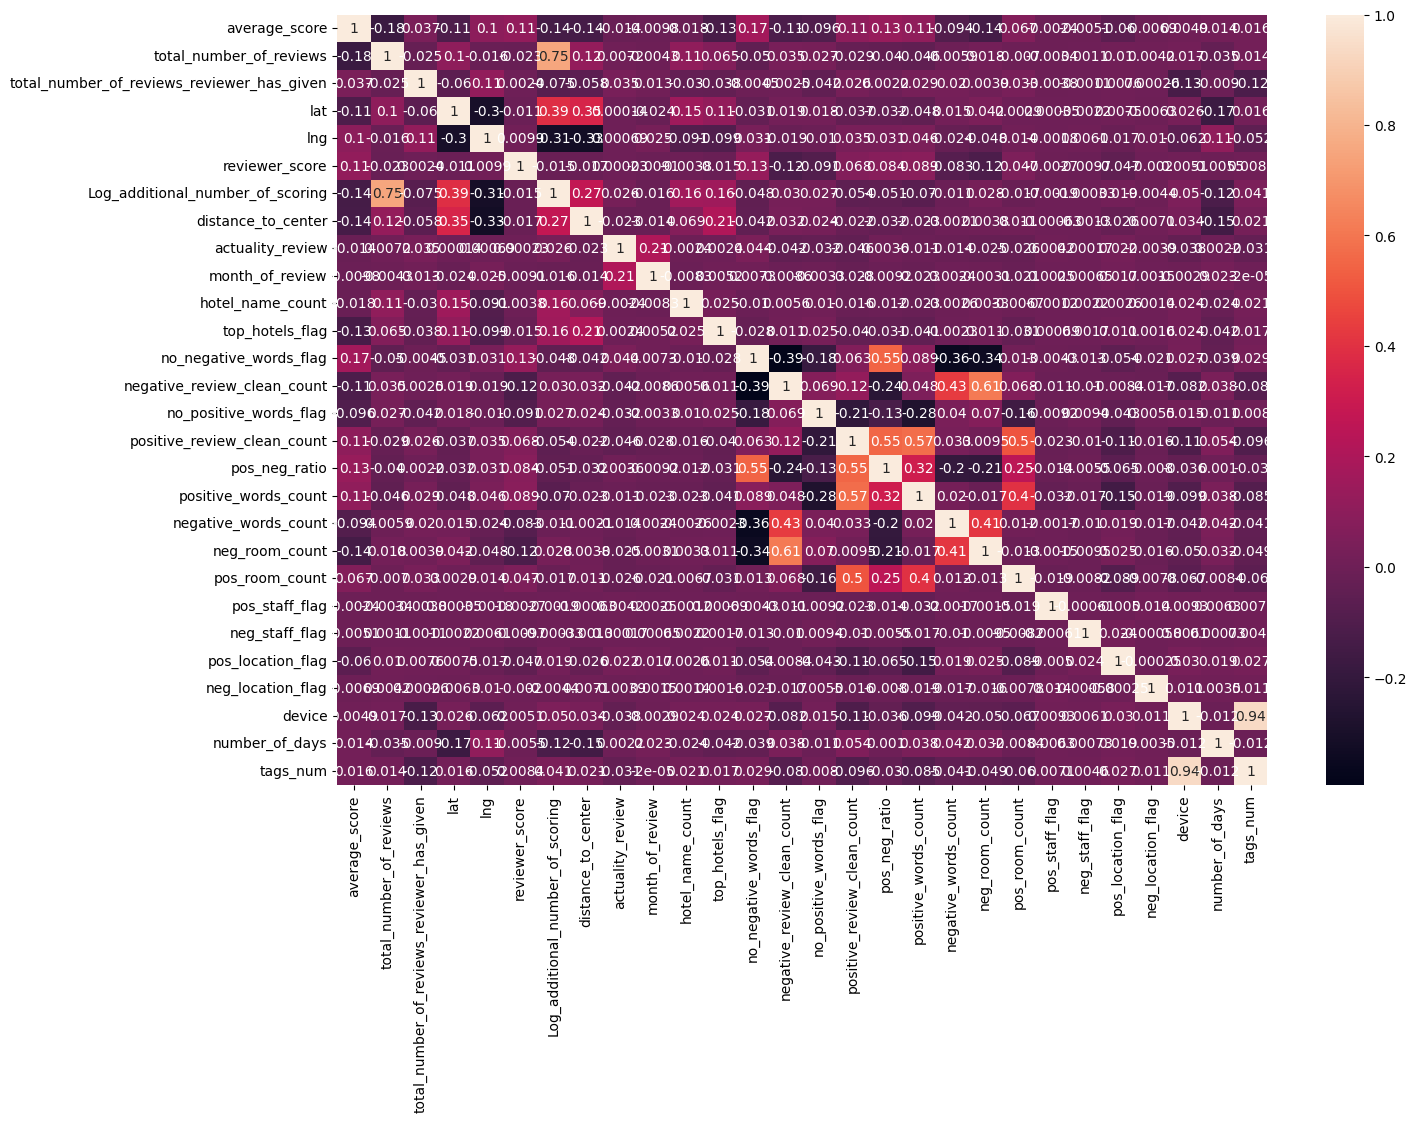

In [169]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data_to_model.drop(['sample'], axis=1).corr(numeric_only=True), annot=True)

In [170]:
#удалим один из пары признаков с корреляцией выше 0.70
param_to_drop =  pd.DataFrame(data_to_model.drop(['sample'], axis=1).corr(numeric_only=True).abs().unstack().sort_values(ascending=False).drop_duplicates().head(30))
param_to_drop.columns =['Corr']
param_to_drop[param_to_drop['Corr']>= 0.70]




,,Corr
average_score,average_score,1.000000
tags_num,device,0.938515
Log_additional_number_of_scoring,total_number_of_reviews,0.752695


In [171]:
data_to_model = data_to_model.drop(['total_number_of_reviews','device'], axis=1)

In [172]:
object_columns = [col for col in data_to_model.columns
    if ((data_to_model[col].dtypes == 'object') | \
        (data_to_model[col].dtype.name == 'category'))]


# смотрим, что можем закодировать

object_columns

['city_hotel',
 'hotel_address',
 'top_reviewer_nationality',
 'trip_type',
 'traveler']

In [173]:
#закодируем категориальные признаки

import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['city_hotel','top_reviewer_nationality', 'trip_type','traveler'] ) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data_to_model[['city_hotel','top_reviewer_nationality', 'trip_type','traveler']])
data_to_model = pd.concat([data_to_model, type_bin], axis=1)

In [174]:
data_to_model = data_to_model.drop(['city_hotel','top_reviewer_nationality','trip_type','traveler'], axis=1)

<Axes: >

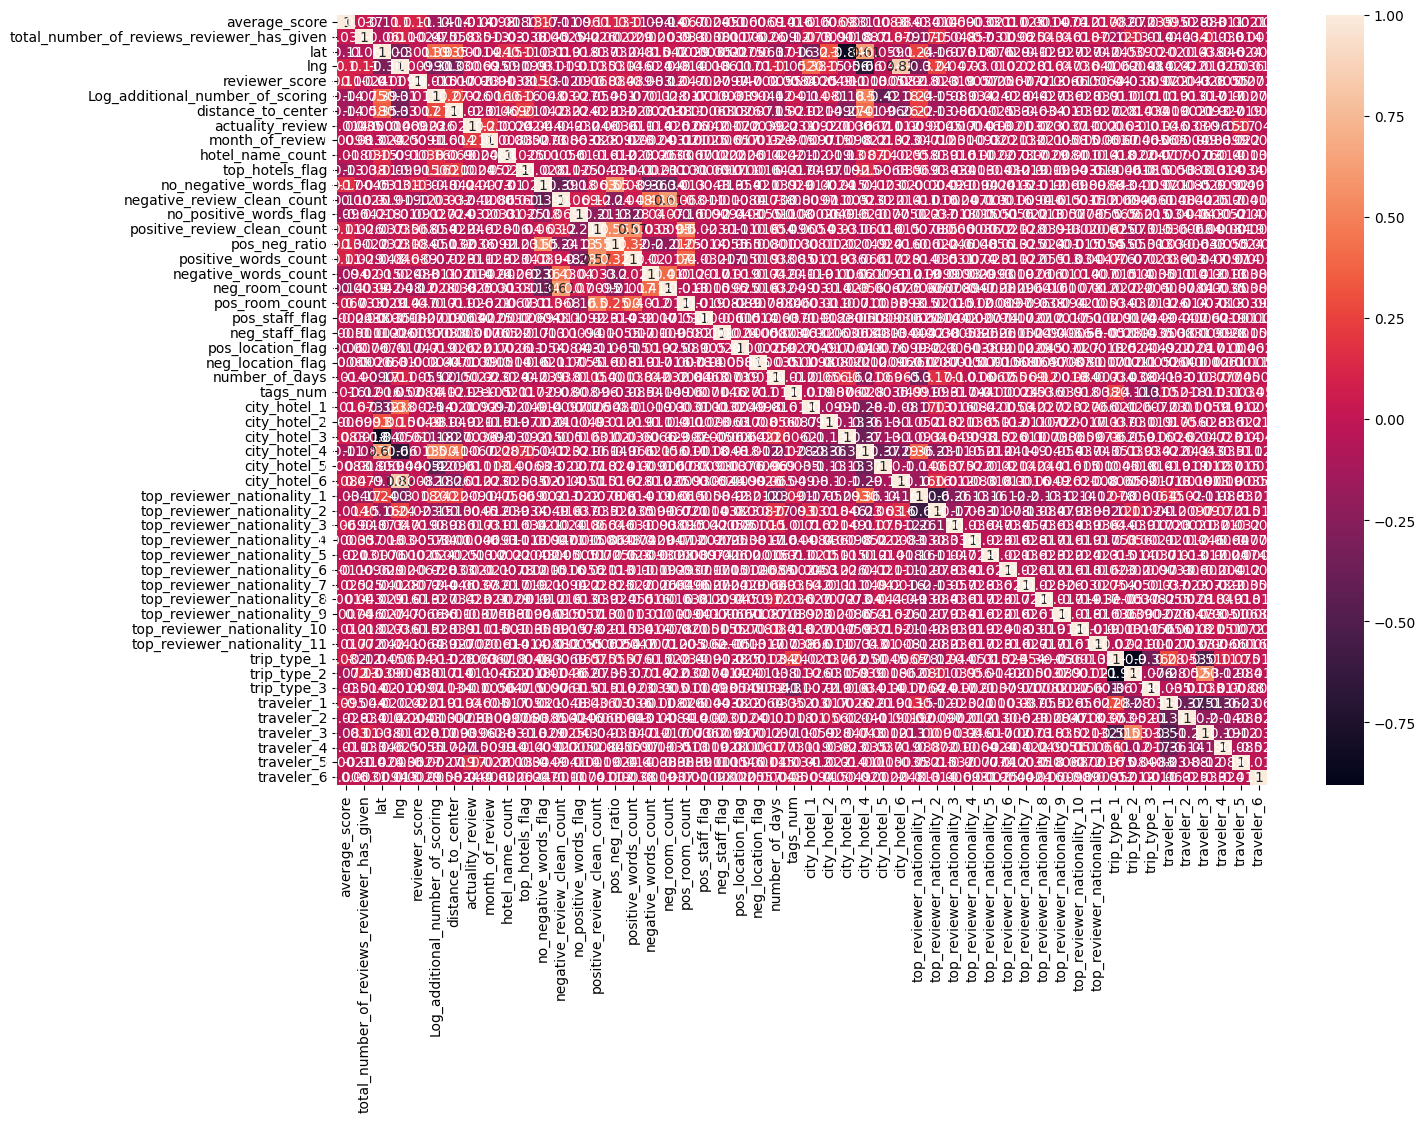

In [175]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data_to_model.drop(['sample'], axis=1).corr(numeric_only=True), annot=True)

In [176]:
#удалим один из пары признаков с корреляцией выше 0.70
param_to_drop =  pd.DataFrame(data_to_model.drop(['sample'], axis=1).corr(numeric_only=True).abs().unstack().sort_values(ascending=False).drop_duplicates().head(30))
param_to_drop.columns =['Corr']
param_to_drop[param_to_drop['Corr']>= 0.70]

,,Corr
average_score,average_score,1.000000
trip_type_1,trip_type_2,0.904047
lat,city_hotel_3,0.844781
lng,city_hotel_6,0.824956


In [177]:
data_to_model = data_to_model.drop(['lat','lng','trip_type_1'], axis=1)

In [178]:
data_to_model.columns

Index(['hotel_address', 'average_score',
       'total_number_of_reviews_reviewer_has_given', 'sample',
       'reviewer_score', 'Log_additional_number_of_scoring',
       'distance_to_center', 'actuality_review', 'month_of_review',
       'hotel_name_count', 'top_hotels_flag', 'no_negative_words_flag',
       'negative_review_clean_count', 'no_positive_words_flag',
       'positive_review_clean_count', 'pos_neg_ratio', 'positive_words_count',
       'negative_words_count', 'neg_room_count', 'pos_room_count',
       'pos_staff_flag', 'neg_staff_flag', 'pos_location_flag',
       'neg_location_flag', 'number_of_days', 'tags_num', 'city_hotel_1',
       'city_hotel_2', 'city_hotel_3', 'city_hotel_4', 'city_hotel_5',
       'city_hotel_6', 'top_reviewer_nationality_1',
       'top_reviewer_nationality_2', 'top_reviewer_nationality_3',
       'top_reviewer_nationality_4', 'top_reviewer_nationality_5',
       'top_reviewer_nationality_6', 'top_reviewer_nationality_7',
       'top_reviewer_n

In [179]:
#и еще раз пересохранимся
data_to_model1 = data_to_model.copy()

In [180]:
object_columns = [col for col in data_to_model1.columns
    if ((data_to_model1[col].dtypes == 'object') | \
        (data_to_model1[col].dtype.name == 'category') | \
        (data_to_model1[col].dtypes == 'datetime64[ns]'))]

# смотрим, что попадает под удаление
print(f'Удалению подлежит {len(object_columns)} столбцов с нечисловыми данными:')
object_columns

Удалению подлежит 1 столбцов с нечисловыми данными:


['hotel_address']

In [181]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
data_to_model1.drop(object_columns, axis = 1, inplace=True)

In [182]:
data_to_model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 50 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               515431 non-null  float64
 1   total_number_of_reviews_reviewer_has_given  515431 non-null  int64  
 2   sample                                      515431 non-null  int64  
 3   reviewer_score                              515431 non-null  float64
 4   Log_additional_number_of_scoring            515431 non-null  float64
 5   distance_to_center                          515431 non-null  float64
 6   actuality_review                            515431 non-null  int16  
 7   month_of_review                             515431 non-null  int32  
 8   hotel_name_count                            515431 non-null  int64  
 9   top_hotels_flag                             515431 non-null  int64  
 

In [1930]:
#не используется, тк ухудшает MAPE
#удалим после оценки значимости
#data_to_model1 = data_to_model1.drop(['pos_staff_count','traveler_6','top_reviewer_nationality_5','traveler_5'], axis=1)


In [183]:
# Теперь выделим тестовую часть
train_data = data_to_model1.query('sample == 1').drop(['sample'], axis=1)
test_data = data_to_model1.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

_______

## Оценка значимости каждого признака для целевой переменной — рейтинг отеля
#### Для оценки значимости категориальных признаков будем использовать тест хи-квадрат, для непрерывных признаков — тест ANOVA.

In [184]:
data_to_model1.columns

Index(['average_score', 'total_number_of_reviews_reviewer_has_given', 'sample',
       'reviewer_score', 'Log_additional_number_of_scoring',
       'distance_to_center', 'actuality_review', 'month_of_review',
       'hotel_name_count', 'top_hotels_flag', 'no_negative_words_flag',
       'negative_review_clean_count', 'no_positive_words_flag',
       'positive_review_clean_count', 'pos_neg_ratio', 'positive_words_count',
       'negative_words_count', 'neg_room_count', 'pos_room_count',
       'pos_staff_flag', 'neg_staff_flag', 'pos_location_flag',
       'neg_location_flag', 'number_of_days', 'tags_num', 'city_hotel_1',
       'city_hotel_2', 'city_hotel_3', 'city_hotel_4', 'city_hotel_5',
       'city_hotel_6', 'top_reviewer_nationality_1',
       'top_reviewer_nationality_2', 'top_reviewer_nationality_3',
       'top_reviewer_nationality_4', 'top_reviewer_nationality_5',
       'top_reviewer_nationality_6', 'top_reviewer_nationality_7',
       'top_reviewer_nationality_8', 'top_revi

In [185]:
# непрерывные признаки
num_cols = ['average_score', 'total_number_of_reviews_reviewer_has_given', 'Log_additional_number_of_scoring',
       'distance_to_center', 'actuality_review', 'month_of_review',
       'hotel_name_count', 'negative_review_clean_count', 'positive_review_clean_count', 'pos_neg_ratio', 'positive_words_count',
       'negative_words_count', 'neg_room_count','pos_room_count', 'number_of_days', 'tags_num'
]

# категориальные признаки
cat_cols = [ 'top_hotels_flag', 'no_negative_words_flag', 'no_positive_words_flag',
            
       
       'pos_staff_flag', 'neg_staff_flag', 'pos_location_flag',
       'neg_location_flag',
            
            
            'city_hotel_1', 'city_hotel_2',
       'city_hotel_3', 'city_hotel_4', 'city_hotel_5', 'city_hotel_6',
       'top_reviewer_nationality_1', 'top_reviewer_nationality_2',
       'top_reviewer_nationality_3', 'top_reviewer_nationality_4',
       'top_reviewer_nationality_5', 'top_reviewer_nationality_6',
       'top_reviewer_nationality_7', 'top_reviewer_nationality_8',
       'top_reviewer_nationality_9', 'top_reviewer_nationality_10',
       'top_reviewer_nationality_11', 'trip_type_2', 'trip_type_3',
       'traveler_1', 'traveler_2', 'traveler_3', 'traveler_4', 'traveler_5',
       'traveler_6'
            ]

In [89]:
#Для оценки значимости категориальных переменных будем использовать изученный нами непараметрический тест хи-квадрат, реализованный в библиотеке sklearn.feature_selection.chi2.
#
y=y.astype('int')


from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
#при желании раскрыть и посмотреть
#imp_cat.plot(kind = 'barh')

In [90]:
#Для оценки значимости непрерывных переменных будем использовать функцию f_classif из библиотеки sklearn

from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
#при желании раскрыть и посмотреть
#imp_num.plot(kind = 'barh')

In [186]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [187]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 49), (386496, 49), (386496, 48), (309196, 48), (77300, 48))

In [188]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [189]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [190]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.7s finished


In [191]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических. 
print(
    'MAE:', round(metrics.mean_absolute_error(y_test, y_pred),5),
    'MAPE:', round(metrics.mean_absolute_percentage_error(y_test, y_pred),5))

MAE: 0.89936 MAPE: 0.12988


In [192]:
MAPE = metrics.mean_absolute_error(y_test, y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)
metrics = {"MAPE":MAPE,
           "MAE":MAE
           }
experiment.log_metrics(metrics)

{'web': 'https://www.comet.com/api/image/download?imageId=2f84bb178733494fac430a7447e6c31e&experimentKey=e5ecc791fb4a4617a2f0fe9eadf6d46a',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=2f84bb178733494fac430a7447e6c31e&experimentKey=e5ecc791fb4a4617a2f0fe9eadf6d46a',
 'imageId': '2f84bb178733494fac430a7447e6c31e'}

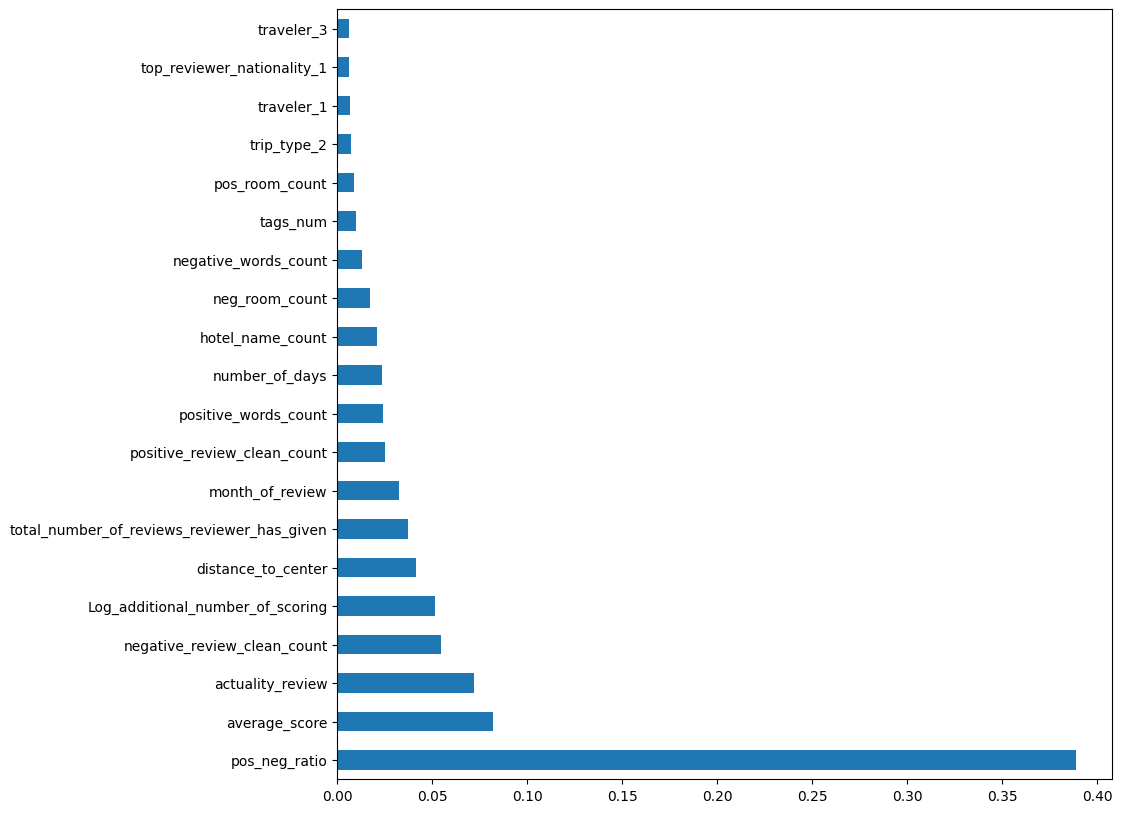

In [193]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
experiment.log_figure(feat_importances)

Комментарии к метрикам оценки качества по мере разработки и оценки признаков:


1) MAE: 0.98231 MAPE: 0.14136 стартовая
2) MAE: 0.98016 MAPE: 0.14123 удалены дубликаты
3) MAE: 0.98081 MAPE: 0.14136 пропуски в долготе и широте заменили на значения мест нахождения отелей и стало хуже
4) MAE: 0.98075 MAPE: 0.14132 пропуски в долготе и широте заменили на медианные значения по городу нахождения отелей (! сделать пропуски нулями лучше)
5) MAE: 0.98096 MAPE: 0.14137 добавили признак - удаленность от центра
6) MAE: 0.98106 MAPE: 0.1414 удалили признак с высокой корреляцией additional_number_of_scoring
7) MAE: 0.98132 MAPE: 0.14139 удалили признак с высокой корреляцией total_number_of_reviews (его и будем удалять)
8) MAE: 0.97942 MAPE: 0.14114 добавили признак категориальный city_hotel, удалили скоррелированные lat, lng
9) MAE: 0.98122 MAPE: 0.14139 добавили признак категориальный city_hotel, удалили скоррелированные 'city_hotel_3','city_hotel_6' ('эта модель хуже MAPE, будем удалять lat,lng)
10) MAE: 0.97948 MAPE: 0.14115 удалили выбросы в additional_number_of_scoring указали 3 сигмы слева и справа
11) MAE: 0.97944 MAPE: 0.14116 удалили выбросы в additional_number_of_scoring указали 4 сигмы слева и 3 справа
12) MAE: 0.9793 MAPE: 0.14112 логарифмировала признак additional_number_of_scoring без удаления выбросов, как есть (так и оставляем)
13) MAE: 0.95422 MAPE: 0.13787 новый признак actuality_review
14) MAE: 0.95346 MAPE: 0.13776 новый признак month_of_review
15) MAE: 0.953 MAPE: 0.13772  заменили выбросы в average_score на мин без выбросов
16) MAE: 0.95312 MAPE: 0.13768 новый признак hotel_name_count
17) MAE: 0.95262 MAPE: 0.13761 новый признак top_hotels_flag
18) MAE: 0.94123 MAPE: 0.13621 новый признак top_reviewer_nationality
19) MAE: 0.94156 MAPE: 0.13626  добавила признак 'reviewer_from_ESC' удалила тот, что коррелирует с ним 'top_reviewer_nationality_3' - (это хуже MAPE, reviewer_from_ESC не берем )
20) MAE: 0.94115 MAPE: 0.13626  добавила признак 'country_hotel_nationality удалила тот, что коррелирует с ним 'top_reviewer_nationality_1' - (это хуже MAPE, country_hotel_nationality не берем ) 
21) MAE: 0.93315 MAPE: 0.13505 добавила признак negative_review_clean_count (почистив существующий), существующий review_total_negative_word_count удален 
22) MAE: 0.93314 MAPE: 0.13505 добавила признак no_negative_words_flag
23) MAE: 0.93242 MAPE: 0.13482 добавила признак pos_neg_ratio, positive_review_clean_count, (почистив существующий), существующий review_total_positive_word_count удален 
24) MAE: 0.93321 MAPE: 0.13498 посмотреть отдельно, что добавляет в модель pos_neg_ratio, поэтому исключила
25) MAE: 0.93235 MAPE: 0.13478 добавила признак no_positive_words_flag 
26) MAE: 0.92324 MAPE: 0.13353 добавила признак negative_words_count
27) MAE: 0.91562 MAPE: 0.1323 добавила признак positive_words_count
28) MAE: 0.91592 MAPE: 0.13233 нормализуем признак total_num_reviews_has_given_norm, а исходный удаляем (стало хуже MAPE, оставляем исходный вариант )
29) MAE: 0.91006 MAPE: 0.13136 добавила признак tag_num
30) MAE: 0.90772 MAPE: 0.13102 добавила признак категориальный trip_type, удалила скоррелированные trip_type_2
31) MAE: 0.90684 MAPE: 0.13091  добавила признак категориальный trip_type, удалила скоррелированные trip_type_1 (эта модель лучше, ее оставляем)
32) MAE: 0.90665 MAPE: 0.1309 добавила признак категориальный  traveler
33) MAE: 0.90683 MAPE: 0.13093 удалила number_of_days, ввела флаг number_of_days_flag (Mape чуть хуже, оставим number_of_days)
34) MAE: 0.90665 MAPE: 0.1309  добавила признак Log_distance_to_center, , удалила скоррелированны distance_to_center
35) MAE: 0.90685 MAPE: 0.13092 нормализовали признак distance_to_center  (Mape чуть хуже, оставим как было)
36) MAE: 0.90684 MAPE: 0.13092 добавила признак отношения кол-ва положительных и отрицательных слов, удалила скоррелированный positive_words_count
37) MAE: 0.90665 MAPE: 0.1309 
38) MAE: 0.90352 MAPE: 0.13052 ввела новый признак, проблемы с номером отеля (кол-во слов room в негативном отзыве)
39) MAE: 0.90656 MAPE: 0.13089 добавила 4 флага по конкретным словам (room, staff (bad,good), location )
40) MAE: 0.90129 MAPE: 0.13025 добавила  'room_problem_count' и 3 флага по словам 'good_staff_count', 'good_location_count', 'good_breakfast_count', 'bad_staff_count', 1 флаг по животным из тэгов 'pet',
41) MAE: 0.90196 MAPE: 0.1303  удалим незначимые признаки и посмотрим на качество модели
42) MAE: 0.90145 MAPE: 0.13023 удалила незначимые, но в меньшем количестве
43) MAE: 0.90148 MAPE: 0.13027 удалила только 'pet','good_staff_count'
44) MAE: 0.90109 MAPE: 0.13021 удалила только 'pet'
______________
45) MAE: 0.89936 MAPE: 0.12988 покреативила опять над признаками по словам в отзывах (final model) почистила и добавила слов
_______________
46) MAE: 0.89994 MAPE: 0.12995  удалила после оценки значимости 'pos_staff_count','traveler_6','top_reviewer_nationality_5','traveler_5'


In [194]:
test_data.sample(10)

,average_score,total_number_of_reviews_reviewer_has_given,reviewer_score,Log_additional_number_of_scoring,distance_to_center,actuality_review,month_of_review,hotel_name_count,top_hotels_flag,no_negative_words_flag,...,top_reviewer_nationality_10,top_reviewer_nationality_11,trip_type_2,trip_type_3,traveler_1,traveler_2,traveler_3,traveler_4,traveler_5,traveler_6
85820,8.5,9,0.0,6.501290,0.897310,411,6,5,0,0,...,0,0,1,0,1,0,0,0,0,0
25550,8.9,11,0.0,3.583519,2.158844,150,3,5,0,0,...,0,0,0,0,0,1,0,0,0,0
63629,8.2,1,0.0,5.170484,1.467452,387,7,3,0,0,...,0,0,0,0,0,0,1,0,0,0
26316,9.2,3,0.0,6.042633,1.002635,716,8,3,0,1,...,0,0,0,0,0,1,0,0,0,0
126713,7.8,3,0.0,7.066467,4.757782,491,3,4,1,1,...,0,0,0,0,0,0,1,0,0,0
29299,9.0,11,0.0,4.394449,0.515444,499,3,4,0,0,...,0,0,1,0,0,0,1,0,0,0
128674,8.2,1,0.0,5.036953,4.261647,29,7,3,0,0,...,0,0,0,0,1,0,0,0,0,0
12834,8.7,8,0.0,6.463029,9.053925,492,3,5,1,0,...,0,0,0,0,1,0,0,0,0,0
26363,8.1,4,0.0,4.174387,0.515444,585,12,3,0,0,...,0,0,0,0,0,0,0,0,1,0
9042,8.1,70,0.0,4.174387,0.515444,527,2,3,0,0,...,0,0,1,0,1,0,0,0,0,0


In [195]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [196]:
sample_submission

,reviewer_score,id
0,8.708,488440
1,7.110,274649
2,7.579,374688
3,9.514,404352
4,9.506,451596
...,...,...
128930,9.165,495812
128931,9.359,315577
128932,7.608,511968
128933,9.570,303386


In [197]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.2s finished


In [198]:
predict_submission

array([8.708, 7.11 , 7.579, ..., 7.608, 9.57 , 7.266])

In [199]:
list(sample_submission)

['reviewer_score', 'id']

In [200]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.708,488440
1,7.110,274649
2,7.579,374688
3,9.514,404352
4,9.506,451596
5,8.378,302161
6,7.887,317079
7,7.432,13963
8,8.640,159785
9,6.834,195089


Вместо вывода:

В рамках проекта были проработаны материалы курса по тематике EDA (очистка данных, обработка и создание признаков, проведение анализа признаков).
Стремилась снизить MAPE до показателя ниже 0.13, что получилось (однако при сабмите на Kaggle модель отработала хуже)

В рамках разработки и отбора признаков можно добиться лучших результатов, но считаю ключевую цель данного проекта достигнутой, поэтому закончила исследование.